# Insurance Project
## Table of Contents
<ul>
<li>Introduction</li>
<li>Importing The Libraries</li>
<li>Reading The Data</li>
<li>Data Inspection</li>
<li>Exploratory Data Analysis(EDA)</li>
<li>Data Preprocessing</li>
<li>Building The Models</li>
<li>Evaluating The Models Performance</li>
</ul>

# Introduction

> In this project i will predict the charges based on some features by using insurance data.

# Importing The Libraries

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
sns.set(rc = {'figure.figsize':[7,7]},font_scale = 1.2)

# Reading The Data

In [2]:
df = pd.read_csv('insurance.csv')

# Data Inspection

In [3]:
#The first five rows from the data
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0.0,yes,southwest,16884.92400
1,18,male,33.770,1.0,no,southeast,1725.55230
2,28,male,33.000,3.0,no,southeast,4449.46200
3,33,male,22.705,0.0,no,northwest,21984.47061
4,32,male,28.880,0.0,no,northwest,3866.85520


In [4]:
#The shape of the data
df.shape

(1338, 7)

In [5]:
#The information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1330 non-null   float64
 3   children  1333 non-null   float64
 4   smoker    1329 non-null   object 
 5   region    1329 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


- We have 4 numerical features and 3 categorical features.
- We have missing values in the data.

In [6]:
#Data describtion
df.describe()

,age,bmi,children,charges
count,1338.000000,1330.000000,1333.000000,1338.000000
mean,39.207025,30.648323,1.095274,13270.422265
std,14.049960,6.099505,1.205250,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.237500,0.000000,4740.287150
50%,39.000000,30.380000,1.000000,9382.033000
75%,51.000000,34.600000,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
#No.of missing values in each feature
df.isna().sum()

age         0
gender      0
bmi         8
children    5
smoker      9
region      9
charges     0
dtype: int64

- There are missing values in these features `bmi`, `children`, `smoker` and `region`.

# Exploratory Data Analysis(EDA)

In [8]:
#The data columns
df.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
def histogram(data,x,bins='auto',c=None):
    ''' 
    This function plots the distribution of the data by using the histogram.
    INPUT:
    data: pandas.core.frame.DataFrame. The data frame.
    x: str. A feature.
    bins: int. The histogram bins.
    c: str. The histogram color.
    OUTPUT:
    The feature distribution.
    '''
    sns.histplot(data = data,x=x,bins = bins,color=c)
    plt.title('The '+x.title()+' Distribution')
    plt.xlabel(x.title())
    plt.show()

def cntplt(data,x,palette,title,y=None,hue=None):
    '''
    This function for showing the counts of observations in each categorical value.
    INPUT:
    data: pandas.core.frame.DataFrame. The dataset.
    x: str. Feature name in the dataset.
    y: str. Feature name in the dataset.
    palette: str. Palette name.
    title: str. Countplot title.
    hue: str. Feature name in the dataset.
    OUTPUT:
    Countplot represent the counts of observations in each categorical value.
    '''
    sns.countplot(data=data,x=x,y=y,hue=hue,palette=palette)
    plt.xlabel(x.title())
    plt.ylabel("Count")
    plt.title(title.title())
    if hue != None:
        plt.legend(title=hue.title())
    plt.show()

def bxplot(data,x,palette,title,y=None,hue=None):
    '''
    This function for showing distributions with respect to categories.
    INPUT:
    data: pandas.core.frame.DataFrame. The data set.
    x: str. Feature name in the data set.
    y: str. Feature name in the data set.
    palette: str. Palette name.
    title: str. boxplot title.
    hue: str. Feature name in the dataset.
    OUTPUT:
    Boxplot represent the distributions with respect to categories.
    '''
    sns.boxplot(data=data,x=x,y=y,hue=hue,palette=palette)
    plt.xlabel(x.title())
    plt.ylabel(y.title())
    plt.title(title.title())
    plt.show()

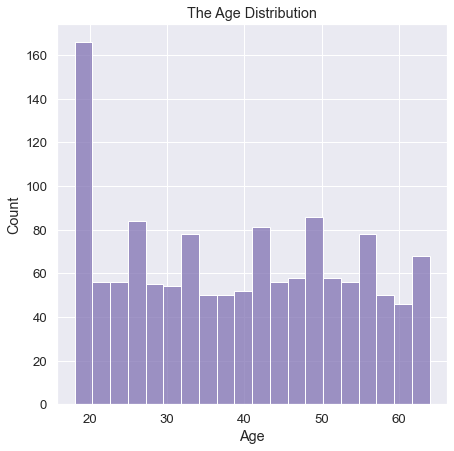

In [10]:
histogram(df,'age',bins=20,c='m')

- Most people in the data in the age of eighteen and nineteen.

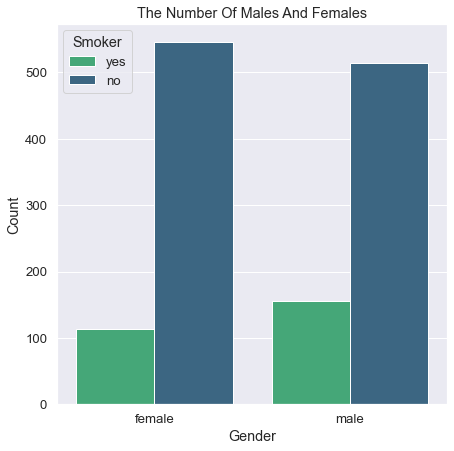

In [11]:
cntplt(df,'gender','viridis_r','The number of males and females',hue = 'smoker')

- Most of the data are males, and the smokers in males greater than females.

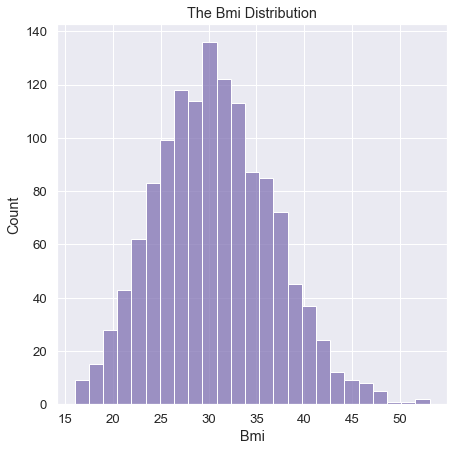

In [12]:
histogram(df,'bmi',c = 'm')

- Looks like normal distribution and most of the people bmi almost equal to 32. 

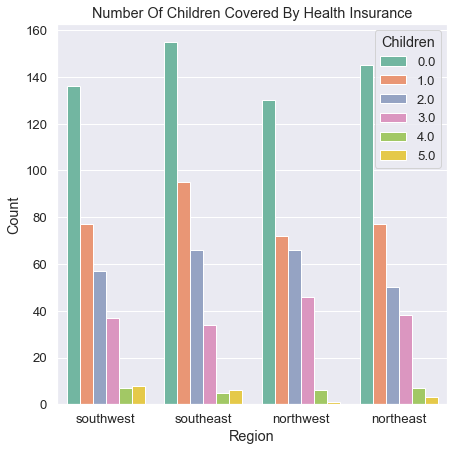

In [13]:
cntplt(df,'region','Set2','Number of children covered by health insurance',hue='children')

- Looks most people in the data didn't have kids.
- Most people in the data from the southeast.

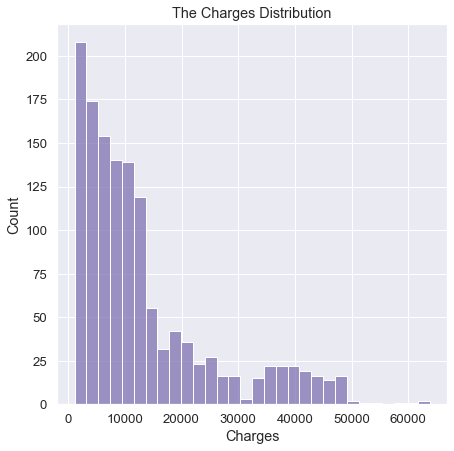

In [14]:
histogram(df,'charges',c='m')

- Most of the individual medical costs billed by health insurance less than 10000.

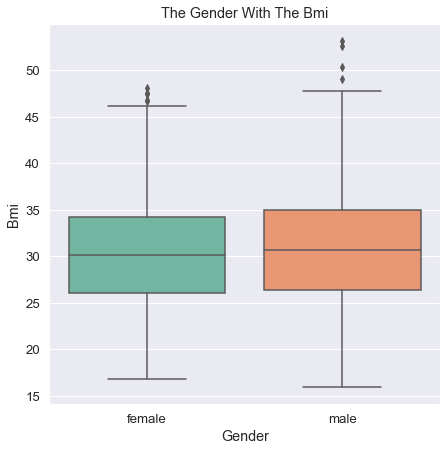

In [15]:
bxplot(df,'gender','Set2','The gender with the bmi','bmi')

- There are a variety of bmi values in males more than in females.

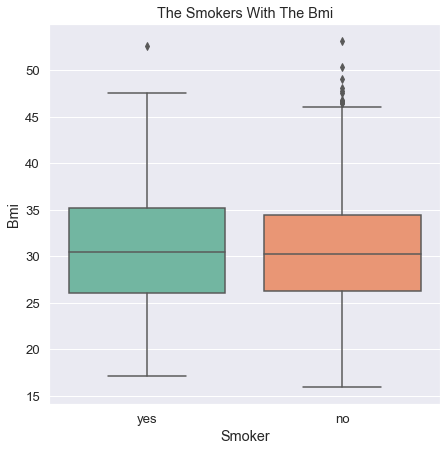

In [16]:
bxplot(df,'smoker','Set2','The smokers with the bmi','bmi')

- Bmi can be high with smokers compare to non smokers.

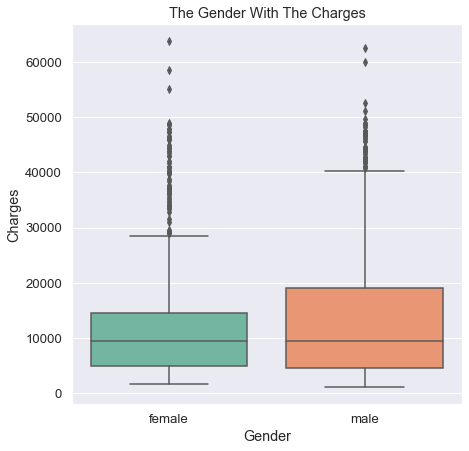

In [17]:
bxplot(df,'gender','Set2','The gender with the charges','charges')

- Charges in males can be very high compare to females.

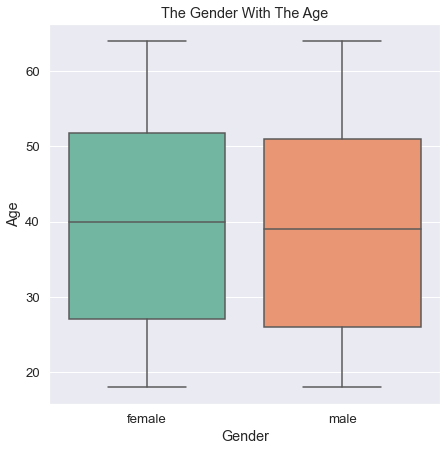

In [18]:
bxplot(df,'gender','Set2','The gender with the age','age')

- Looks both of males and females at the same range of the age.

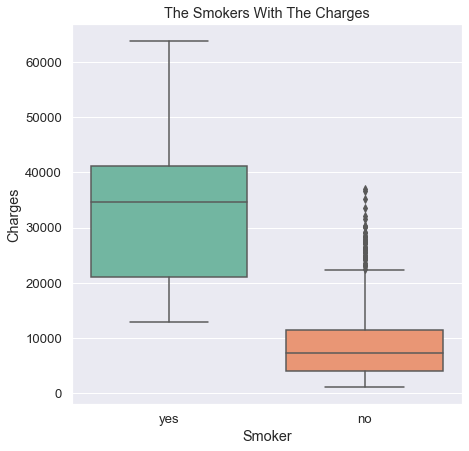

In [19]:
bxplot(df,'smoker','Set2','The smokers with the charges','charges')

- People who smoke they can cost a big charges compare to the people who don't.

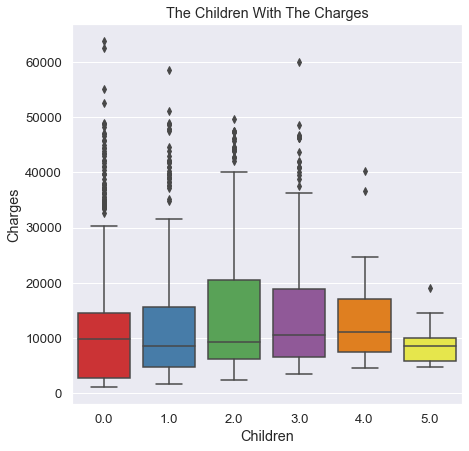

In [20]:
bxplot(df,'children','Set1','The children with the charges','charges')

- It's something strange actually, as we can see the 5 children have less cost of charges compare to the others.

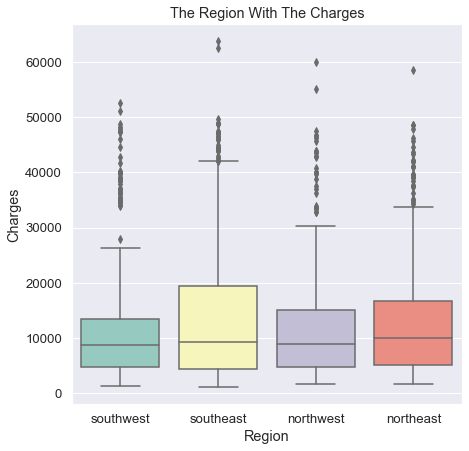

In [21]:
bxplot(df,'region','Set3','The region with the charges','charges')

- People whose they are from southeast they can cost much more than the others.

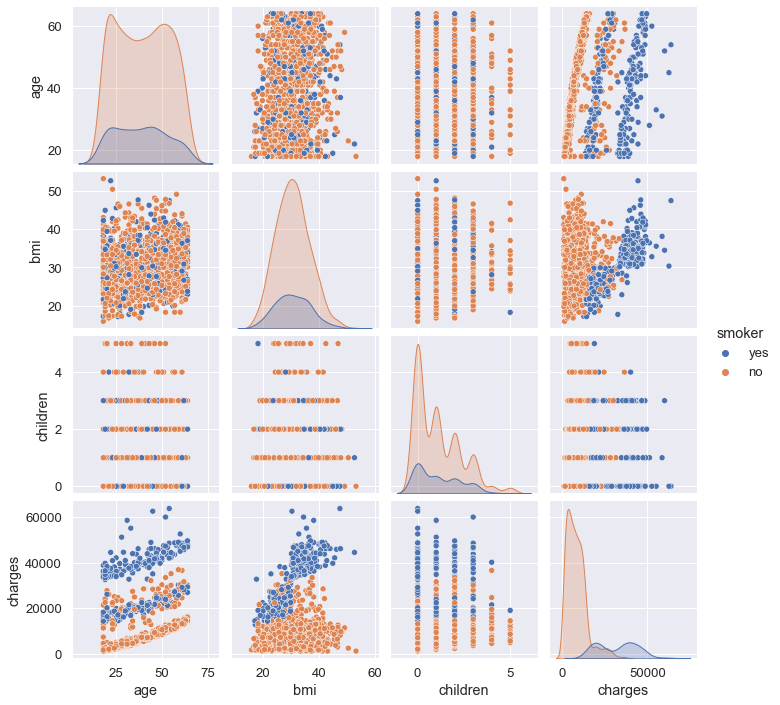

In [22]:
sns.pairplot(df,hue = 'smoker');

- Children feature we consider it as a categorical feature.
- Most of the people aren't smokers.
- There are a correlation between some features but it looks not that high one.

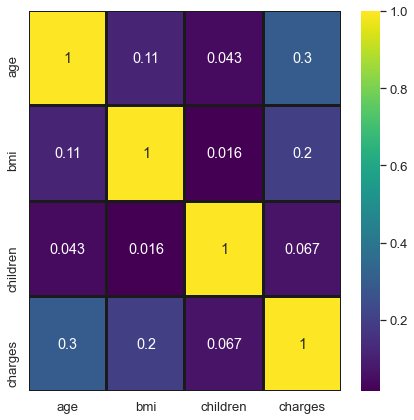

In [23]:
sns.heatmap(df.corr(),cmap = 'viridis',linecolor = 'k',linewidth = 2,annot = True);

- There are a weak positive correlation between some columns and no correlation between some columns in the data.

# Data Preprocessing

In [24]:
#Taking a copy from our data
insur_df = df.copy()

In [25]:
insur_df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0.0,yes,southwest,16884.92400
1,18,male,33.770,1.0,no,southeast,1725.55230
2,28,male,33.000,3.0,no,southeast,4449.46200
3,33,male,22.705,0.0,no,northwest,21984.47061
4,32,male,28.880,0.0,no,northwest,3866.85520


##### Cleaning The Missing Data

In [26]:
insur_df['bmi'].fillna(insur_df['bmi'].mean(),inplace=True)

In [27]:
imputer = SimpleImputer(strategy="most_frequent")
insur_df['children']=imputer.fit_transform(insur_df[['children']])
insur_df['smoker']=imputer.fit_transform(insur_df[['smoker']])
insur_df['region']=imputer.fit_transform(insur_df[['region']])

In [28]:
insur_df.isna().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

- No missing values.

##### Converting Categorical Data To Numerical Data

In [29]:
insur_df_ = pd.get_dummies(data=insur_df,columns=['gender','children','smoker','region'],drop_first=True)

In [30]:
insur_df_.head()

,age,bmi,charges,gender_male,children_1.0,children_2.0,children_3.0,children_4.0,children_5.0,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0


##### Splitting The Data To x and y

In [31]:
x = insur_df_.drop(['charges'],axis = 1)
y = insur_df_['charges']

In [32]:
x.head()

,age,bmi,gender_male,children_1.0,children_2.0,children_3.0,children_4.0,children_5.0,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1,1,0,0,0,0,0,0,1,0
2,28,33.000,1,0,0,1,0,0,0,0,1,0
3,33,22.705,1,0,0,0,0,0,0,1,0,0
4,32,28.880,1,0,0,0,0,0,0,1,0,0


In [33]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

##### Splitting The Data For Training and Testing

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1,shuffle=False)

##### Scaling The Data

In [35]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Building The Models

##### Linear Regression 

In [36]:
#Fitting the model
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [37]:
#The predicted data
y_pred = lr.predict(x_test)

##### Polynomial Regression

In [40]:
#Fitting the polynomial features
poly = PolynomialFeatures(degree = 2)
poly.fit(x_train)
poly_x_train = poly.transform(x_train)
poly_x_test = poly.transform(x_test)

In [41]:
#Scaling the data
scaler = StandardScaler()
scaler.fit(poly_x_train)
poly_x_train = scaler.transform(poly_x_train)
poly_x_test = scaler.transform(poly_x_test)

In [42]:
#Fitting the model
poly_lr = LinearRegression()
poly_lr.fit(poly_x_train,y_train)

LinearRegression()

In [43]:
#The predicted data
poly_pred = poly_lr.predict(poly_x_test)

- Of course i will not use this model because of overfitting.
- Regularization is coming.

##### Lasso

In [51]:
#Fitting the model
lasso = Lasso(alpha = 10)
lasso.fit(poly_x_train,y_train)

Lasso(alpha=10)

In [52]:
#The predicted data
lasso_pred = lasso.predict(poly_x_test)

##### Ridge

In [58]:
#Fitting the model
ridge = Ridge(alpha = 60)
ridge.fit(poly_x_train,y_train)

Ridge(alpha=60)

In [59]:
#The predicted data
ridge_pred = ridge.predict(poly_x_test)

# Evaluating The Models Performance

In [60]:
#Obtaining the accuracy of the models
models = {'Linear Regression':[lr,x_train,y_pred],
            'Lasso':[lasso,poly_x_train,lasso_pred],
            'Ridge':[ridge,poly_x_train,ridge_pred]
         }
for model_name, model_lst in models.items():
    print(model_name,':')
    print('Training Score: ',model_lst[0].score(model_lst[1],y_train))
    print('Testing Score: ',r2_score(y_test,model_lst[2]))
    print('--------------------------------')

Linear Regression :
Training Score:  0.7414278480294163
Testing Score:  0.7577284215466763
--------------------------------
Lasso :
Training Score:  0.8454241430802936
Testing Score:  0.8318910275056961
--------------------------------
Ridge :
Training Score:  0.8440890786685653
Testing Score:  0.7802229462339159
--------------------------------


- The best model in this problem is lasso.